In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd

df = pd.read_csv('Prod_Rec.csv')

In [ ]:
df.head()

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [ ]:
df = df.drop(["NONE","Timestamp"],axis=1).replace("ตัวเลือก 1", 0).fillna(0)
df = df.iloc[2:,1:].reset_index(drop=True).rename_axis('Survey').copy()

In [ ]:
df.head()

,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
Survey,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,0,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,0,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,0,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
4,0,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [ ]:
missing = df.isnull().sum()
print(missing)

เครื่องซักผ้า                             0
รองเท้าวิ่ง                               0
ผักกรอบ                                   0
คอร์สเรียนเสริม                           0
nintendo switch                           0
BTC (Bitcoin)                             0
mechanical keyboard                       0
เครื่องดูดฝุ่น Dyson                      0
เคส ipad                                  0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่            0
สินค้าจากพิมรี่พาย                        0
I PHONE 13                                0
หูฟัง bluetooth (airpods,truewireless)    0
แก้วน้ำ Starbucks                         0
เบาะรองนั่ง                               0
เครื่องชงกาแฟแคปซูล                       0
ตั๋วเครื่องบินไปญี่ปุ่น                   0
Ebook                                     0
ตู้เย็น                                   0
กล้องฟิล์ม                                0
เครื่องดนตรี                              0
whey protein                              0
วัตถุมงคล                       

In [ ]:
df.melt()['value'].value_counts(dropna=False)

ไม่เคยซื้อ    399
เคยซื้อ       221
ไม่เคย         24
0              16
เคย            15
Name: value, dtype: int64

In [ ]:
df.replace({'เคย':1 ,'เคยซื้อ': 1, 'ไม่เคย':0,'ไม่เคยซื้อ': 0}, inplace=True)
df.head()

,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
Survey,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
2,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1
4,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.09, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(เครื่องซักผ้า),(รองเท้าวิ่ง),0.111111,0.962963,0.111111,1.000000,1.038462,0.004115,inf
1,(รองเท้าวิ่ง),(เครื่องซักผ้า),0.962963,0.111111,0.111111,0.115385,1.038462,0.004115,1.004831
2,(เครื่องซักผ้า),(คอร์สเรียนเสริม),0.111111,0.925926,0.111111,1.000000,1.080000,0.008230,inf
3,(คอร์สเรียนเสริม),(เครื่องซักผ้า),0.925926,0.111111,0.111111,0.120000,1.080000,0.008230,1.010101
4,(เครื่องซักผ้า),(เคส ipad),0.111111,0.888889,0.111111,1.000000,1.125000,0.012346,inf
5,(เคส ipad),(เครื่องซักผ้า),0.888889,0.111111,0.111111,0.125000,1.125000,0.012346,1.015873
6,(เครื่องซักผ้า),"(หูฟัง bluetooth (airpods,truewireless))",0.111111,0.777778,0.111111,1.000000,1.285714,0.024691,inf
7,"(หูฟัง bluetooth (airpods,truewireless))",(เครื่องซักผ้า),0.777778,0.111111,0.111111,0.142857,1.285714,0.024691,1.037037
8,(เครื่องซักผ้า),(ตู้เย็น),0.111111,0.444444,0.111111,1.000000,2.250000,0.061728,inf
9,(ตู้เย็น),(เครื่องซักผ้า),0.444444,0.111111,0.111111,0.250000,2.250000,0.061728,1.185185


In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['support'] >= 0.6) &
        rules['confidence'] >= 0.7 ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.962963,0.777778,0.777778,0.807692,1.038462,0.028807,1.155556
21,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.777778,0.962963,0.777778,1.000000,1.038462,0.028807,inf
26,(Ebook),(รองเท้าวิ่ง),0.629630,0.962963,0.629630,1.000000,1.038462,0.023320,inf
27,(รองเท้าวิ่ง),(Ebook),0.962963,0.629630,0.629630,0.653846,1.038462,0.023320,1.069959
104,"(หูฟัง bluetooth (airpods,truewireless))",(เคส ipad),0.777778,0.888889,0.703704,0.904762,1.017857,0.012346,1.166667
105,(เคส ipad),"(หูฟัง bluetooth (airpods,truewireless))",0.888889,0.777778,0.703704,0.791667,1.017857,0.012346,1.066667
326,"(รองเท้าวิ่ง, คอร์สเรียนเสริม)","(หูฟัง bluetooth (airpods,truewireless))",0.888889,0.777778,0.703704,0.791667,1.017857,0.012346,1.066667
327,"(หูฟัง bluetooth (airpods,truewireless), คอร์ส...",(รองเท้าวิ่ง),0.703704,0.962963,0.703704,1.000000,1.038462,0.026063,inf
328,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless), คอร์ส...",0.962963,0.703704,0.703704,0.730769,1.038462,0.026063,1.100529
329,"(หูฟัง bluetooth (airpods,truewireless))","(รองเท้าวิ่ง, คอร์สเรียนเสริม)",0.777778,0.888889,0.703704,0.904762,1.017857,0.012346,1.166667


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s

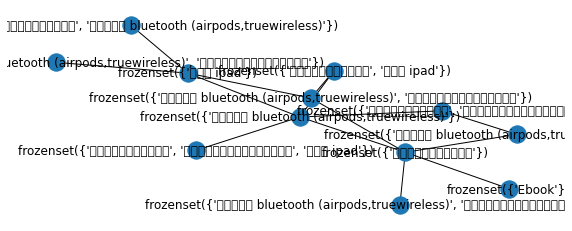

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(final,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

ดังนั้น Rules ที่น่าสนใจจะมี
- หูฟัง bluetooth (airpods,truewireless) -> รองเท้าวิ่ง อาจเกิดในกลุ่มลูกค้าที่ชอบการออกกำลังกายและชื่นชอบการมีไอเทมเสริม